In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Load the Reuters dataset (we'll use a subset for faster computation)
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

# Print dataset details
print(f'Training samples: {len(x_train)}, Test samples: {len(x_test)}')
print(f'Example news article: {x_train[0]}')  # Prints the tokenized version of the article
print(f'Corresponding label: {y_train[0]}')  # Prints the category label


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 8982, Test samples: 2246
Example news article: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Corresponding label: 3


In [ ]:
# Maximum length of articles (you can adjust based on your needs)
max_length = 200

# Pad sequences to ensure all articles are the same length
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Convert labels to one-hot encoding (useful for multi-class classification)
num_classes = np.max(y_train) + 1
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

print(f'Shape of training data: {x_train.shape}')
print(f'Shape of training labels: {y_train.shape}')


Shape of training data: (8982, 200)
Shape of training labels: (8982, 46)


In [ ]:
# Build the model
model = Sequential()

# Add an Embedding layer (for word embedding)
model.add(Embedding(input_dim=10000, output_dim=128))

# Add LSTM layer
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Add a Dense layer for classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 71s 483ms/step - accuracy: 0.3485 - loss: 2.6932 - val_accuracy: 0.5004 - val_loss: 1.9918
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 80s 473ms/step - accuracy: 0.5078 - loss: 1.9084 - val_accuracy: 0.5459 - val_loss: 1.9062
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 82s 475ms/step - accuracy: 0.5522 - loss: 1.7044 - val_accuracy: 0.5730 - val_loss: 1.6824
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 81s 472ms/step - accuracy: 0.5887 - loss: 1.5923 - val_accuracy: 0.5886 - val_loss: 1.6344
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 69s 488ms/step - accuracy: 0.6279 - loss: 1.4822 - val_accuracy: 0.6336 - val_loss: 1.4674


In [ ]:
# Evaluate the model
score, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')


71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.6456 - loss: 1.4395
Test accuracy: 63.36%


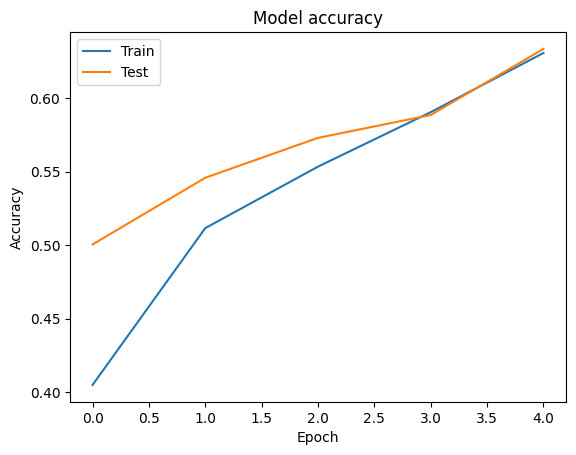

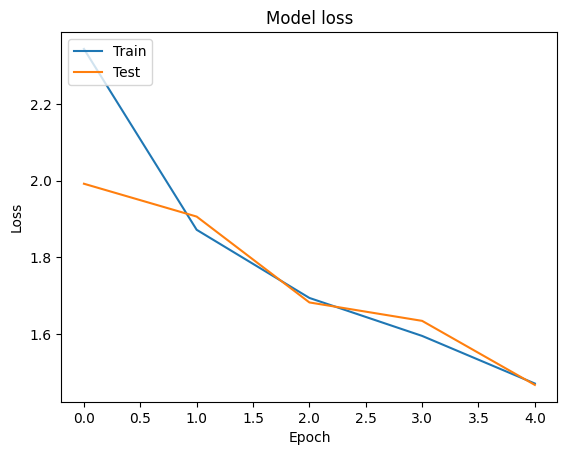

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
# Example prediction on a test article
sample_article = x_test[0].reshape(1, max_length)
prediction = model.predict(sample_article)
predicted_class = np.argmax(prediction)
print(f'Predicted class: {predicted_class}, Actual class: {np.argmax(y_test[0])}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Predicted class: 3, Actual class: 3
